In [1]:
#opencv reads image in BGR
#we need to convert into RGB

In [2]:
# High pass filter to make image edges visible
# To remove noise we use low pass filter

In [3]:
# Canny edge Detector
# Hough Transform is used to identify line,curvers,cirlce,ellipse
# Haar cascade is used for face detection
# RoY: Region of Interest


In [4]:
# Countour : used in robotics


In [5]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [6]:
image = cv2.imread('apple.jpg')
rgb_image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)


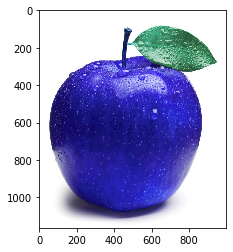

In [7]:
plt.imshow(image)
plt.show()

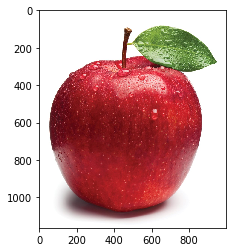

In [8]:
plt.imshow(rgb_image)
plt.show()

In [9]:
rand_image = np.random.randint(5, size=(100, 100))

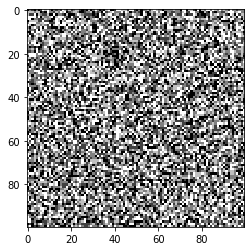

In [10]:
plt.imshow(rand_image,cmap='gray')
plt.show()

In [11]:
rand_image

array([[0, 2, 1, ..., 2, 2, 2],
       [3, 3, 3, ..., 4, 2, 2],
       [3, 1, 1, ..., 1, 3, 3],
       ...,
       [4, 4, 1, ..., 1, 1, 2],
       [0, 1, 0, ..., 1, 4, 1],
       [2, 4, 0, ..., 4, 2, 1]])

In [12]:
black = np.repeat(255,100*100).reshape(100,100)/255


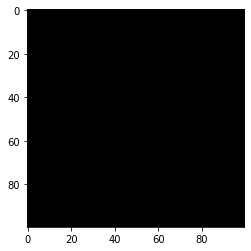

In [13]:
plt.imshow(black,cmap='gray',vmax = 255,vmin=0)

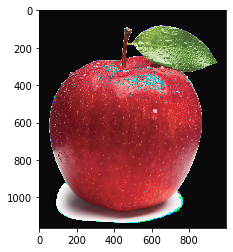

In [14]:
bfg = 1* rgb_image  + 10
plt.imshow(bfg)
# 4 is contrast and 50 is brightness

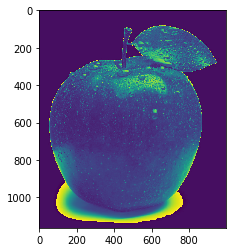

In [15]:
plt.imshow(bfg[:,:,2])

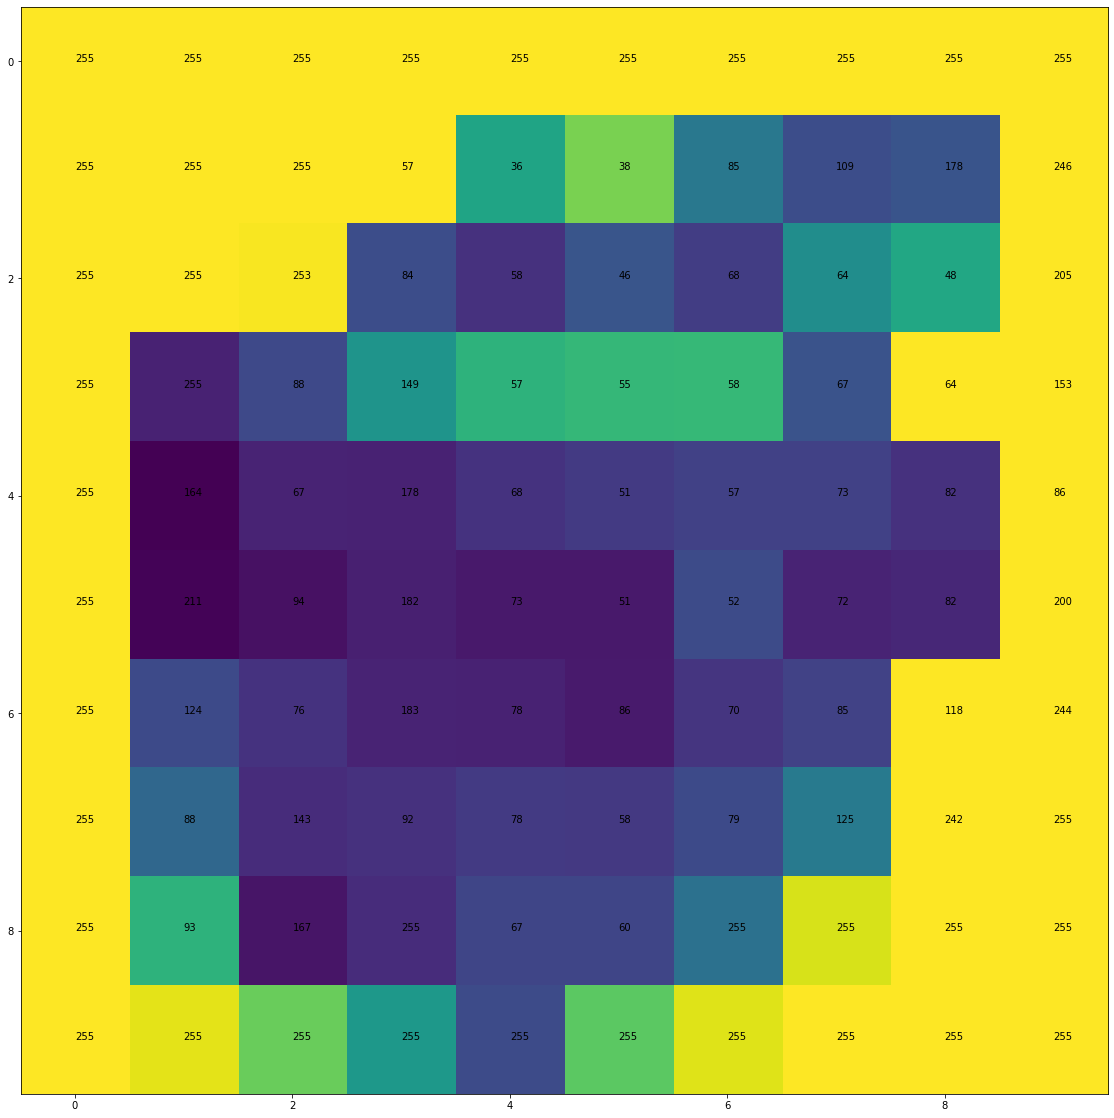

In [16]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.resize(gray,(10,10))

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)

r = 0

for rows in gray:
        c =0
        for pixel in rows:
            ax.annotate(pixel, xy = (r,c))
            c = c+1
        r=r+1
        
    
ax.imshow(gray)
plt.show()

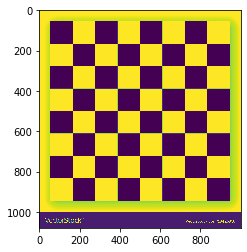

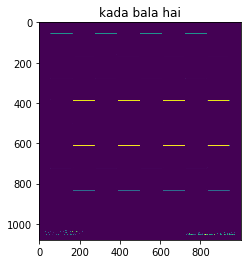

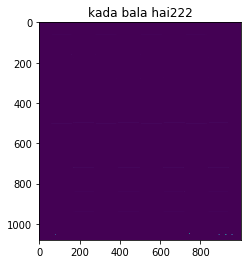

In [17]:
# edge detection using filters
coin = cv2.imread('chess.jpg',0)
plt.imshow(coin)
plt.show()




# sobel * filter High pass filter===>Sobel filter
sobel_x = np.array([[-1,1,-1],
                    [0,0,0],
                    [-1,1,-1]])

sobel_y = sobel_x.T



kernel1 =  np.array([[-1,2,1],
                 [-1,2,1],
                 [-1,2,1],])

sobel_naya =  np.array([[1,-1,1],
                 [0,0,0],
                 [-1,-1,-1],])

# filtered = cv2.filter2D(coin,-1,kernel1)
# plt.imshow(filtered)



filtered1 = cv2.filter2D(coin,-1,sobel_naya)
plt.imshow(filtered1)
plt.title("kada bala hai")
plt.show()


filtered2 = cv2.filter2D(coin,-1,sobel_y)
plt.title("kada bala hai222")

plt.imshow(filtered2)


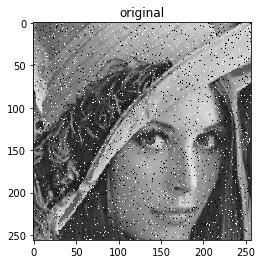

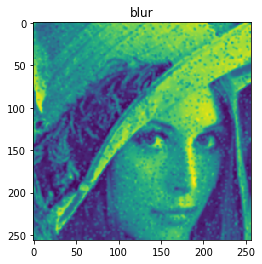

In [23]:
noise = cv2.imread('salt2.png', 0)
plt.imshow(noise, cmap='gray')
plt.title("original")
plt.show()


blur = cv2.GaussianBlur(noise, (5,5),-1)
plt.imshow(blur)
plt.title("blur")
plt.show()




In [39]:
cap = cv2.VideoCapture(0)


while True:
    ret, frame = cap.read()
#     print(ret)
    cv2.imshow('Video', frame)
    
    k = cv2.waitKey(5) & 0xFF
    
    if k == 27: #escape key
        cv2.imwrite('me.png', frame)
        break
        
cap.release()
cv2.destroyAllWindows()
    
    

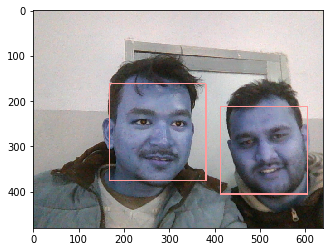

In [40]:
img = cv2.imread('me.png''',1)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
dir_ = "haarcascade_frontalface_default.xml"

face_cascade = cv2.CascadeClassifier(dir_)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x,y,w,h) in faces:
    img = cv2.rectangle(img, (x,y),(x+w, y+h),(255,155,155),2)
#     2 vanya rect ko border
plt.imshow(img)

In [36]:
faces

array([[293, 249, 709, 709]], dtype=int32)

In [42]:
# video ko lagi
dir_ = "haarcascade_frontalface_default.xml"

face_cascade = cv2.CascadeClassifier(dir_)


In [44]:
dir_ = "haarcascade_frontalface_default.xml"
face_cascade = cv2.CascadeClassifier(dir_)

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if ret:
        gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray,1.3,5)
        
        for(x, y, w, h) in faces:
            img = cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)#@ is thickness of rectangular border
        cv2.imshow('Detecting',img)
    
    k = cv2.waitKey(5) & 0xFF
    
    if k == 27: #escape key
        cv2.imwrite('me.png',frame)
        break
        
cap.release()
cv2.destroyAllWindows()